In [1]:
import numpy as np 
import pandas as pd 

# Exploratory Data Analysis

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.shape

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Checking missing values

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data Cleaning

In [7]:
df = df.set_index('id')

Fixing date values to make it usable.

In [8]:
df['date']

id
7129300520    20141013T000000
6414100192    20141209T000000
5631500400    20150225T000000
2487200875    20141209T000000
1954400510    20150218T000000
                   ...       
263000018     20140521T000000
6600060120    20150223T000000
1523300141    20140623T000000
291310100     20150116T000000
1523300157    20141015T000000
Name: date, Length: 21613, dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

# Feature Engineering

In [10]:
df['date_year'] = df.date.dt.year
df['date_year']

id
7129300520    2014
6414100192    2014
5631500400    2015
2487200875    2014
1954400510    2015
              ... 
263000018     2014
6600060120    2015
1523300141    2014
291310100     2015
1523300157    2014
Name: date_year, Length: 21613, dtype: int32

In [11]:
df['age_built'] = df['date_year'] - df['yr_built']
df['age_built']

id
7129300520    59
6414100192    63
5631500400    82
2487200875    49
1954400510    28
              ..
263000018      5
6600060120     1
1523300141     5
291310100     11
1523300157     6
Name: age_built, Length: 21613, dtype: int64

# Feature Selection


In [12]:
to_remove = [
    'date',
    'lat',
    'long',
    'yr_built',
    'yr_renovated',
    'date_year'
]

cleaned_df = df.drop(columns=to_remove)
cleaned_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
id,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,59
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,63
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,49
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,5
6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,1
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,5


In [13]:
cleaned_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,1986.552492,12768.455652,43.317818
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,685.391304,27304.179631,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,399.000000,651.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,115.000000


In [14]:
cleaned_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.585379,0.082447,-0.053951
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,-0.154324
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,-0.506407
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,-0.318488
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,-0.052990
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,-0.489640
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,0.026093
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,0.053458
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,0.360665
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248,-0.447415


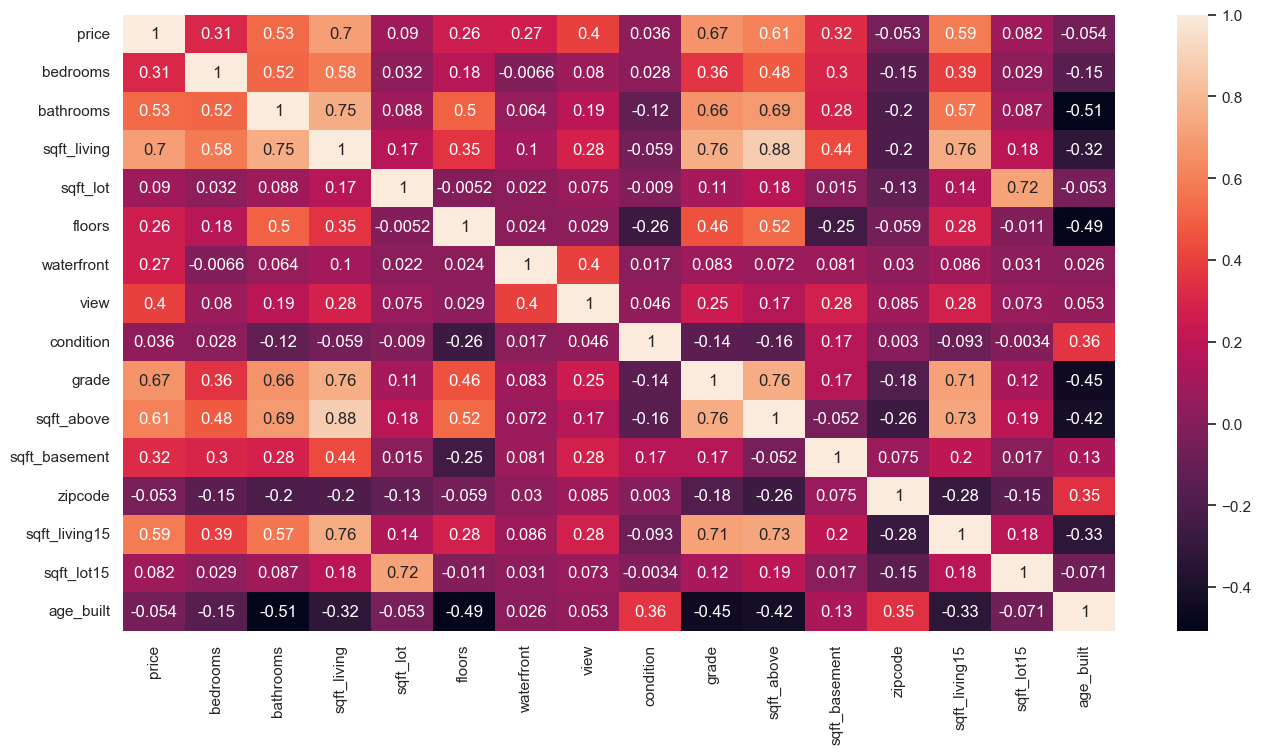

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
import matplotlib.pyplot as plt

sns.heatmap(cleaned_df.corr(), annot=True)
plt.show()

<Axes: ylabel='Frequency'>

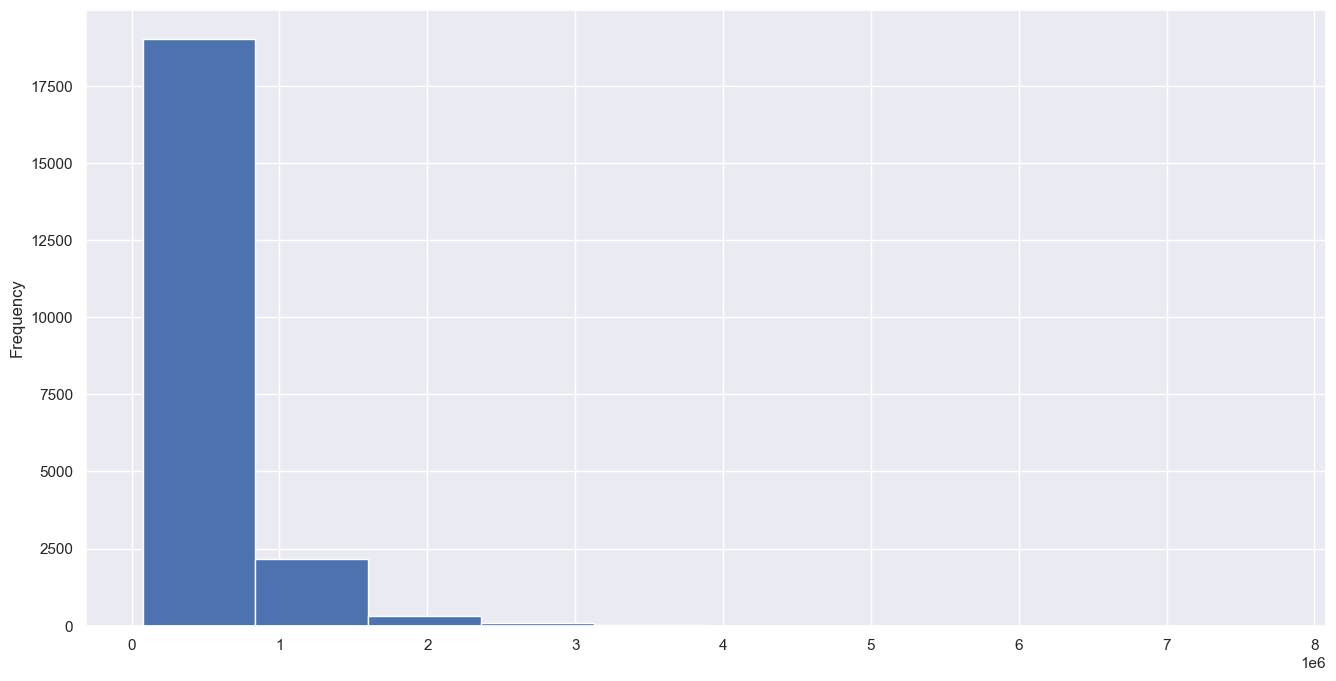

In [16]:
cleaned_df.price.plot.hist()

In [17]:
cleaned_df = cleaned_df[cleaned_df.price <= 2e6]

<Axes: ylabel='Frequency'>

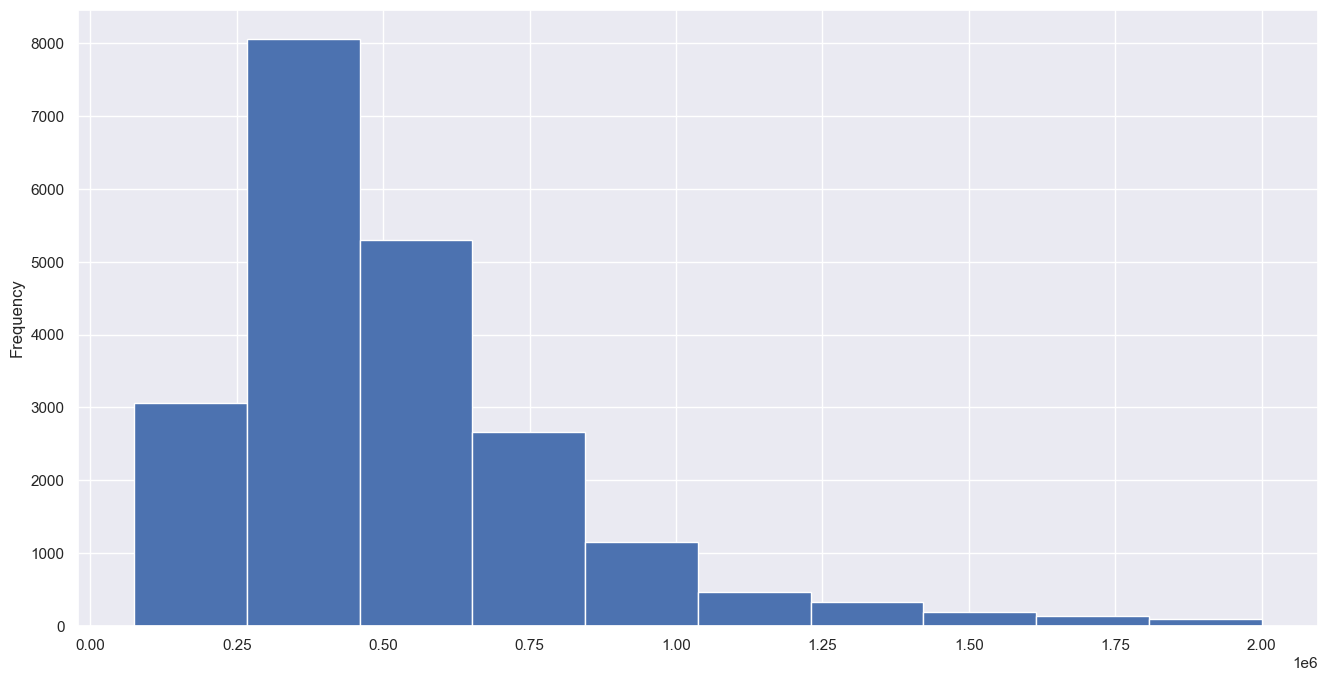

In [18]:
cleaned_df.price.plot.hist()

In [19]:
X = cleaned_df.drop('price',axis=1)
y = cleaned_df['price']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0]

array([0.09090909, 0.4       , 0.19645293, 0.00080568, 0.8       ,
       0.        , 0.        , 0.5       , 0.58333333, 0.20196353,
       0.        , 0.58585859, 0.2654424 , 0.00132445, 0.00862069])

In [22]:
len((X_train[0]))

15

## Pearson Component Analysis (PCA)

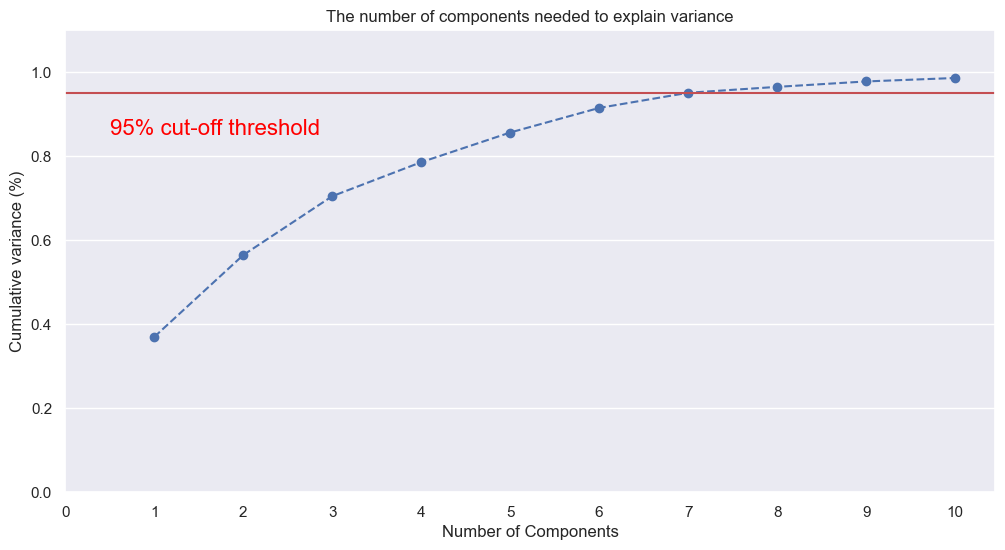

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(X_train)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Now, we can do it the easy way. Letting the library to decide it for us.

In [24]:
pca = PCA(n_components=0.95)
pca = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: [0.36947484 0.19499365 0.14017253 0.08105317 0.07063818 0.05855835
 0.03605389]
[[ 0.02458613  0.18856241  0.19257089  0.00800383  0.40041118 -0.00587675
  -0.00491364 -0.16121548  0.17223143  0.22220717 -0.05300384 -0.47745511
   0.20237169  0.01180485 -0.62402545]
 [ 0.00445834  0.10337672  0.09153201 -0.00735549  0.44369007  0.02749272
   0.17132869 -0.19208193  0.10133634  0.09837295 -0.00934647  0.81881611
   0.04377209 -0.01073981 -0.15643092]
 [ 0.0448655   0.16100352  0.33270134  0.01584959 -0.13034882  0.08953832
   0.64831431  0.23823513  0.17934702  0.17626639  0.3625526  -0.07853213
   0.31230809  0.02112019  0.24539546]
 [ 0.01932632  0.03900141  0.08390661 -0.00118206  0.60922551 -0.03752212
  -0.25997185  0.39554391  0.05055804  0.18486194 -0.21565343 -0.12646011
   0.05114522 -0.00346879  0.5409281 ]
 [-0.05848401 -0.18625196 -0.30132731 -0.0011087   0.26677854  0.14192818
   0.64030085 -0.27194691 -0.13556695 -0.13006777 -0.39305093 -0.22423413
  -0

In [25]:
len((X_train[0]))

7

# Modeling

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [27]:
y_pred = reg.predict(X_test)

# Evaluation

In [28]:
reg.score(X_test, y_test)

0.6079109259145141

In [29]:
import matplotlib.pyplot as plt
import numpy as np
  
x = range(len(y_pred))
y1 = y_test
y2 = y_pred

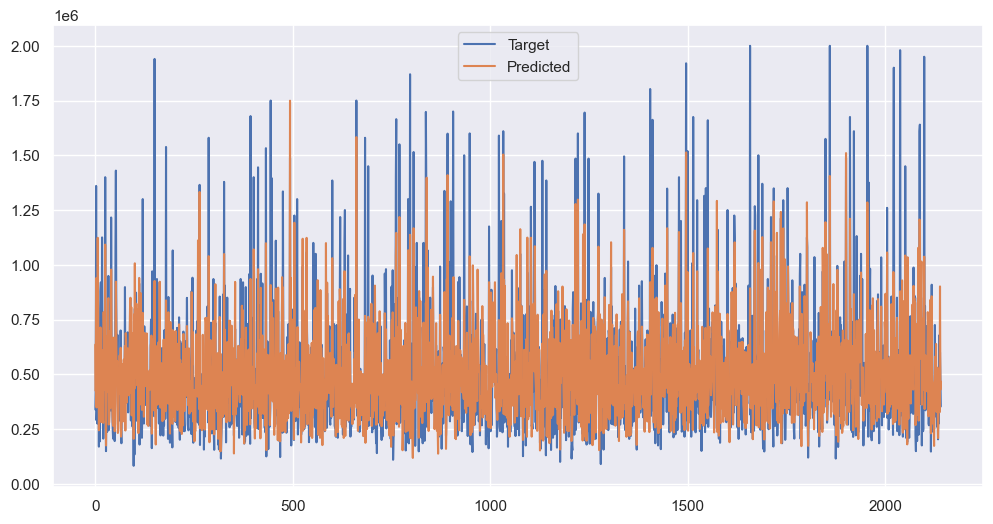

In [30]:
plt.plot(x, y1, label = "Target")
plt.plot(x, y2, label = "Predicted")
plt.legend()
plt.show()